# Linear Regression 

## Theory

Before going forward , we will expand on the idea of 2+x=4 and we will try to increase our knowledge base. 
Just keep following the equations below and with each equation try to understand what is changing in both mathematical form and graphically.

2+x=4
2+x=c => [we changed the number 4 to a constant variable]
2+2x=c => or can i say 2+y=c once i have that , it looks like the previous equation. [we have replaced a variable 2x with y] 

now , let's increase the variables

x + y = 4 => this basically says give me the pair of x and y that when sums up gives 4

similarly, 2x + 4y = 30 is same as p + q = c

Now we are searching for 2 variable pairs


Now lets increase the variables
3x + 4y + 5z = 30

We are now looking for triplets (3,4,1) 


So , For we have learnt there are various ways of writing a special type of problems and finding their solutions. 
""" THE WORLD """ calls it system of linear equations



#### Wikipedia

A system of linear equations refers to a set of two or more linear equations involving the same variables. Each equation in the system represents a linear relationship between the variables, where each variable is raised to the power of 1 (no exponents). The goal of solving a system of linear equations is to find values for the variables that satisfy all the equations simultaneously.

A system of linear equations can be represented in general form as:

python
Copy code <br>
a11x1 + a12x2 + ... + a1nxn = b1 <br>
a21x1 + a22x2 + ... + a2nxn = b2 <br>
...<br>
am1x1 + am2x2 + ... + amnxn = bm<br>
Here:<br>

x1, x2, ..., xn are the variables.
a11, a12, ..., amn are the coefficients of the variables in each equation.
b1, b2, ..., bm are the constant terms on the right side of each equation.
m is the number of equations in the system.
n is the number of variables in the system.
The solution to a system of linear equations is the set of values for the variables that satisfy all the equations. There are three possible outcomes for the solution of a system:

Unique Solution: The system has one set of values for the variables that satisfies all equations.
No Solution: The system of equations is inconsistent and does not have a set of values that satisfy all equations simultaneously.
Infinite Solutions: The system is dependent and has multiple sets of values that satisfy all equations, leading to overlapping or coincident equations.
Solving a system of linear equations involves finding the values of the variables that satisfy the equations. Common methods for solving these systems include substitution, elimination (also known as Gaussian elimination), and matrix methods. These methods can be performed manually or using computational tools like calculators or software programs.

## Implementation 

### Downloading the dataset from kaggle

In [26]:
# DataSet from Kaggel : https://www.kaggle.com/code/divan0/multiple-linear-regression/input
import os
os.environ['KAGGLE_USERNAME'] = "sriramkumar420"
os.environ['KAGGLE_KEY'] = "0d455bdd4bc21a598861aee0150cdf04"

import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('erolmasimov/price-prediction-multiple-linear-regression', path='.', unzip=True)

In [27]:
import pandas as pd
raw = pd.read_csv('./scrap price.csv')


#### Once we have data loaded in our RAM / python variable .<br> We will try to understand the dataset and will try to understand the values of each variables and their relationships


In [28]:
raw.head(3)


,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [29]:
raw.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [35]:
# Step 4: Visualize individual variables
# Loop through each column and create histograms and box plots
raw = raw[raw.columns[1:]]
# import matplotlib.pyplot as plt
# import seaborn as sns

# for column in raw.columns:
#     if raw[column].dtype in ['int64', 'float64']:
#         plt.figure(figsize=(10, 5))
#         plt.subplot(1, 2, 1)
#         sns.histplot(raw[column], kde=True)
#         plt.title(f'Histogram of {column}')
        
#         plt.subplot(1, 2, 2)
#         sns.boxplot(y=raw[column])
#         plt.title(f'Box Plot of {column}')
        
#         plt.tight_layout()
#         plt.show()


Certainly! The correlation coefficient measures the linear relationship between two variables. Let's use the variables X and Y to represent the two variables in consideration.

Covariance (Cov):
Covariance measures the extent to which the variables change together. It's calculated as the average of the products of the differences between each variable's value and its mean.

Formula for Covariance:

scss
Copy code
Cov(X, Y) = Σ((X[i] - X̄) * (Y[i] - Ȳ)) / (n - 1)
X[i] and Y[i]: The values of X and Y for the i-th observation.
X̄ and Ȳ: The means of X and Y, respectively.
n: The number of observations.
Standard Deviation (σ):
Standard deviation is a measure of the dispersion of data points from the mean. It indicates how much individual data points deviate from the average.

Formula for Standard Deviation:

scss
Copy code
σ = √(Σ(X[i] - X̄)² / (n - 1))
Correlation Coefficient (ρ or r):
The correlation coefficient is a normalized measure of how strongly two variables are linearly related. It's calculated by dividing the covariance of the variables by the product of their standard deviations.

Formula for Correlation Coefficient:

scss
Copy code
ρ = Cov(X, Y) / (σX * σY)
Cov(X, Y): Covariance between variables X and Y.
σX and σY: Standard deviations of variables X and Y, respectively.
The correlation coefficient ρ takes values between -1 and 1:

ρ = 1: Perfect positive linear correlation.
ρ = -1: Perfect negative linear correlation.
ρ = 0: No linear correlation (variables are not linearly related).
In Python, you can use the numpy library to calculate covariance and standard deviation, and then calculate the correlation coefficient. Here's an example:

python
Copy code
import numpy as np

# Assuming you have arrays X and Y
covariance = np.cov(X, Y)[0, 1]
std_X = np.std(X, ddof=1)
std_Y = np.std(Y, ddof=1)

correlation_coefficient = covariance / (std_X * std_Y)

print(f"Covariance: {covariance:.2f}")
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
Remember that correlation doesn't imply causation; even if variables are correlated, it doesn't necessarily mean one causes the other.





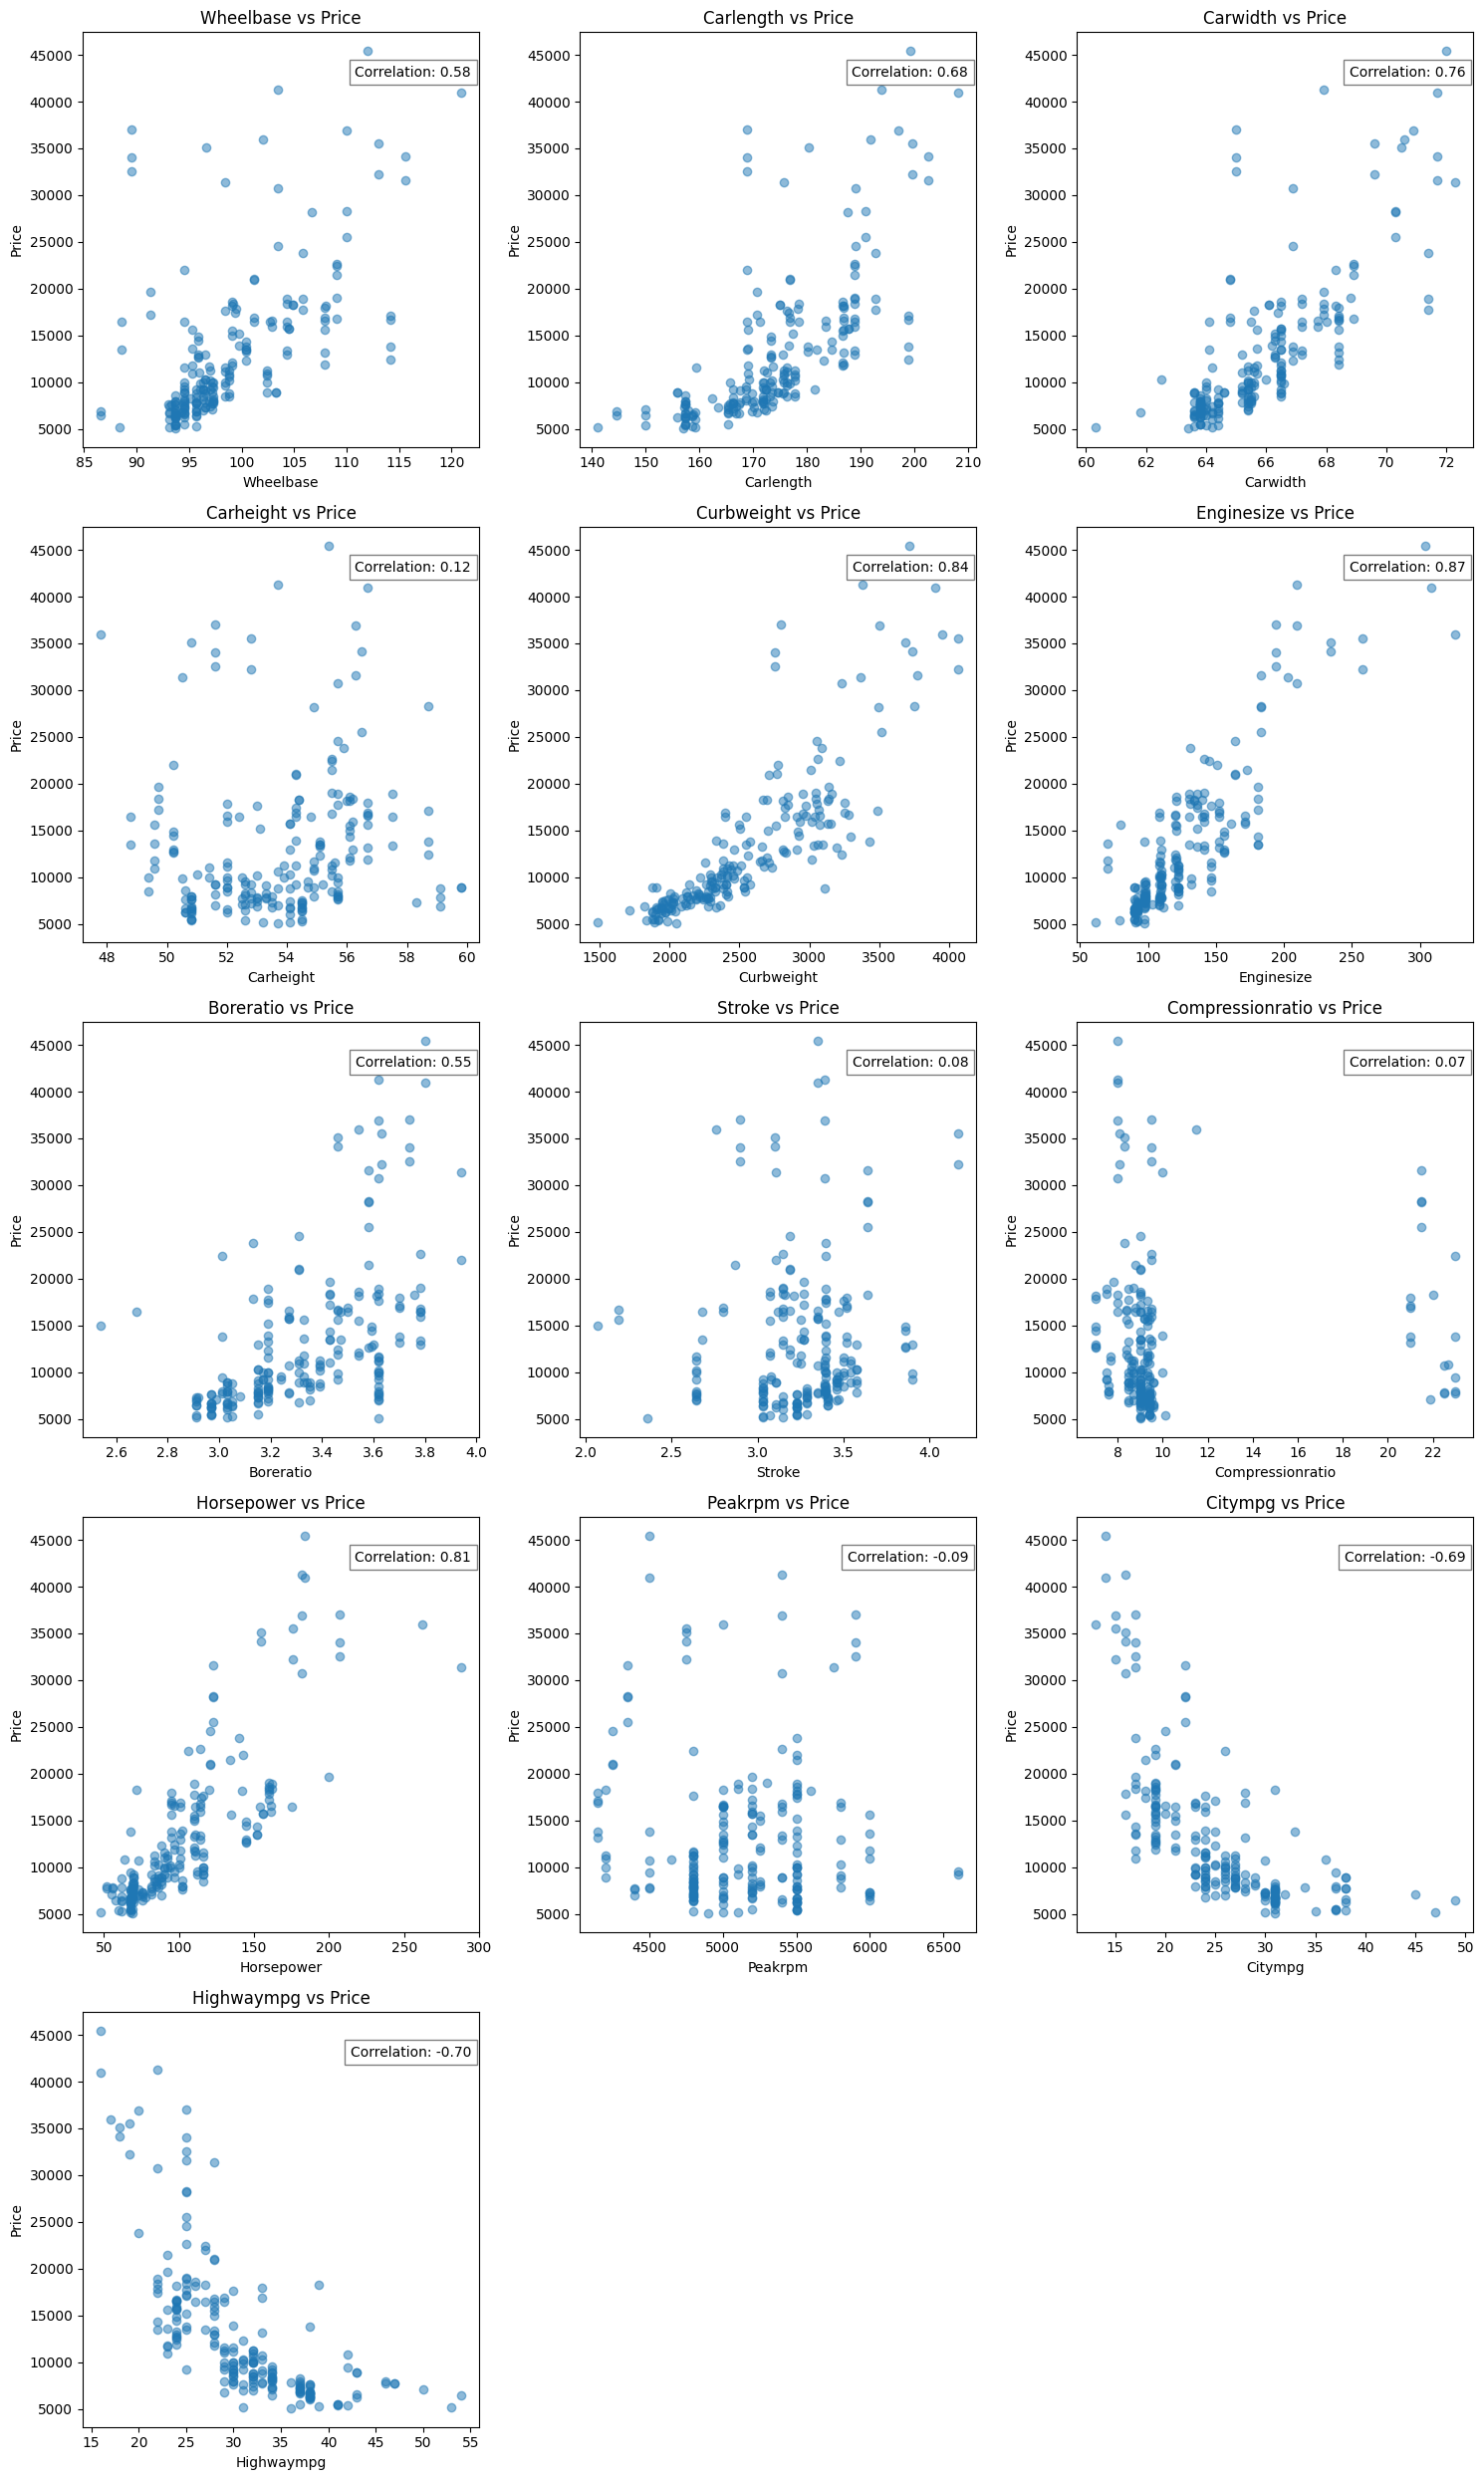

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the 'price' column from the selected columns , only selecting columns which have int data
selected_columns = [col for col in raw.columns if col != 'price' and raw[col].dtype in ['int64', 'float64']]

num_cols = 3
num_rows = (len(selected_columns) - 1) // num_cols + 1

plt.figure(figsize=(15, 5*num_rows))

for index, column in enumerate(selected_columns):
    plt.subplot(num_rows, num_cols, index+1)

    # Scatter plot
    plt.scatter(raw[column], raw['price'], alpha=0.5)
    plt.title(f'{column.capitalize()} vs Price')
    plt.xlabel(column.capitalize())
    plt.ylabel('Price')

    # Calculate correlation coefficient
    corr_coeff = raw[column].corr(raw['price'])
    corr_text = f'Correlation: {corr_coeff:.2f}'
    plt.text(0.98, 0.92, corr_text, transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()

plt.show()


In [45]:
raw.head()

,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [55]:
# pre processing the raw data to only numbers and keeping only important fields



import numpy as np

# Simulated data [0.31472206 0.35680095 0.67152301 0.98624507]
# Replace this with your actual data
X = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])
y = np.array([5, 7, 9, 11])

# Add a column of ones to the feature matrix for the intercept
X = np.column_stack((np.ones(X.shape[0]), X))

# Initialize coefficients with zeros
coefficients = np.zeros(X.shape[1])

# Hyperparameters
learning_rate = 0.000003
epochs = 10000

# Gradient Descent
for epoch in range(epochs):
    # Calculate predicted values
    y_pred = X @ coefficients
    
    # Calculate gradient of the cost function
    gradient = -2 * X.T @ (y - y_pred)
    
    # Update coefficients using gradient descent update rule
    coefficients -= learning_rate * gradient
    
    # Calculate Mean Squared Error (MSE) for monitoring
    mse = np.mean((y - y_pred) ** 2)
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, MSE: {mse:.2f}")

print("Final Coefficients:", coefficients)


Epoch 0, MSE: 69.00
Epoch 100, MSE: 56.06
Epoch 200, MSE: 45.56
Epoch 300, MSE: 37.02
Epoch 400, MSE: 30.08
Epoch 500, MSE: 24.44
Epoch 600, MSE: 19.86
Epoch 700, MSE: 16.14
Epoch 800, MSE: 13.12
Epoch 900, MSE: 10.66
Epoch 1000, MSE: 8.67
Epoch 1100, MSE: 7.04
Epoch 1200, MSE: 5.73
Epoch 1300, MSE: 4.66
Epoch 1400, MSE: 3.79
Epoch 1500, MSE: 3.08
Epoch 1600, MSE: 2.51
Epoch 1700, MSE: 2.04
Epoch 1800, MSE: 1.66
Epoch 1900, MSE: 1.35
Epoch 2000, MSE: 1.10
Epoch 2100, MSE: 0.90
Epoch 2200, MSE: 0.73
Epoch 2300, MSE: 0.60
Epoch 2400, MSE: 0.49
Epoch 2500, MSE: 0.40
Epoch 2600, MSE: 0.33
Epoch 2700, MSE: 0.27
Epoch 2800, MSE: 0.22
Epoch 2900, MSE: 0.19
Epoch 3000, MSE: 0.15
Epoch 3100, MSE: 0.13
Epoch 3200, MSE: 0.11
Epoch 3300, MSE: 0.09
Epoch 3400, MSE: 0.08
Epoch 3500, MSE: 0.07
Epoch 3600, MSE: 0.06
Epoch 3700, MSE: 0.05
Epoch 3800, MSE: 0.04
Epoch 3900, MSE: 0.04
Epoch 4000, MSE: 0.03
Epoch 4100, MSE: 0.03
Epoch 4200, MSE: 0.03
Epoch 4300, MSE: 0.03
Epoch 4400, MSE: 0.02
Epoch 4500, 